In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
ticker = "msft"

In [33]:
tabs = pd.ExcelFile("~\\Documents\\Stocks\\marketwatchscrape.xlsx").sheet_names 

In [34]:
sheetname = [tab for tab in tabs if (ticker in tab)]
sheetname

['msft2022-01-03',
 'msft2022-01-04',
 'msft2022-01-05',
 'msft2022-01-07',
 'msft2022-01-20',
 'msft2022-02-07',
 'msft2022-10-26',
 'msft2023-06-03',
 'msft2023-06-04']

In [35]:
# Function to replace '%'-Percentage and 'B'-Billion from data
def p2f(x):
    if('%' in x):
        return float(x.strip('%'))/100
    elif('B' in x):
        return float(x.strip('B'))*10.**9
# Read first time to get headers
headers=pd.read_excel('~\\Documents\\Stocks\\marketwatchscrape.xlsx', sheet_name=sheetname[-1], skiprows=2,).columns
years = headers[-5:]
df = pd.read_excel('~\\Documents\\Stocks\\marketwatchscrape.xlsx', sheet_name=sheetname[-1], skiprows=2, converters={x:p2f for x in years})
# Slice data to get columns and rows of interest
df=df.iloc[:,16:]
df

,Attribute.1,2018,2019,2020,2021,2022
0,----SRSR,1.101800e+11,1.255000e+11,1.430200e+11,1.680900e+11,1.982700e+11
1,------SG--SG,NaN,1.391000e-01,1.395000e-01,1.753000e-01,1.796000e-01
2,----CGSCOGS.DACGSCOGS.DA,3.897000e+10,4.291000e+10,4.608000e+10,5.223000e+10,6.265000e+10
3,------COGSG--COGSG,NaN,1.011000e-01,7.380000e-02,1.336000e-01,1.995000e-01
4,------COGSDA--COGSDA,2.902000e+10,3.131000e+10,3.378000e+10,4.133000e+10,4.819000e+10
5,------DAE--DAE,9.950000e+09,1.160000e+10,1.230000e+10,1.090000e+10,1.446000e+10
6,------D--D,7.700000e+09,9.700000e+09,1.070000e+10,9.300000e+09,1.246000e+10
7,------AI--AI,2.250000e+09,1.900000e+09,1.600000e+09,1.600000e+09,2.000000e+09
8,----GIGI,7.121000e+10,8.259000e+10,9.694000e+10,1.158600e+11,1.356200e+11
9,------GIG--GIG,NaN,1.599000e-01,1.737000e-01,1.952000e-01,1.706000e-01


In [36]:
#years=df.columns
salesgrowth = df.iloc[1,1:]
# Set negative sales growth to zero
salesgrowth[salesgrowth<0]=0.
Netincomegrowth = df.iloc[39,1:]
# Set negative net income growth to zero
Netincomegrowth[Netincomegrowth<0]=0.
EPSgrowth = df.iloc[49,1:]
# Set negative EPS growth to zero
EPSgrowth[EPSgrowth<0]=0.
EBITDAgrowth = df.iloc[55,1:]
# Set negative EBITDA growth to zero
EBITDAgrowth[EBITDAgrowth<0]=0.
salesgrowth

2018       NaN
2019    0.1391
2020    0.1395
2021    0.1753
2022    0.1796
Name: 1, dtype: object

Text(0.5, 1.0, '% EBITDA Growth')

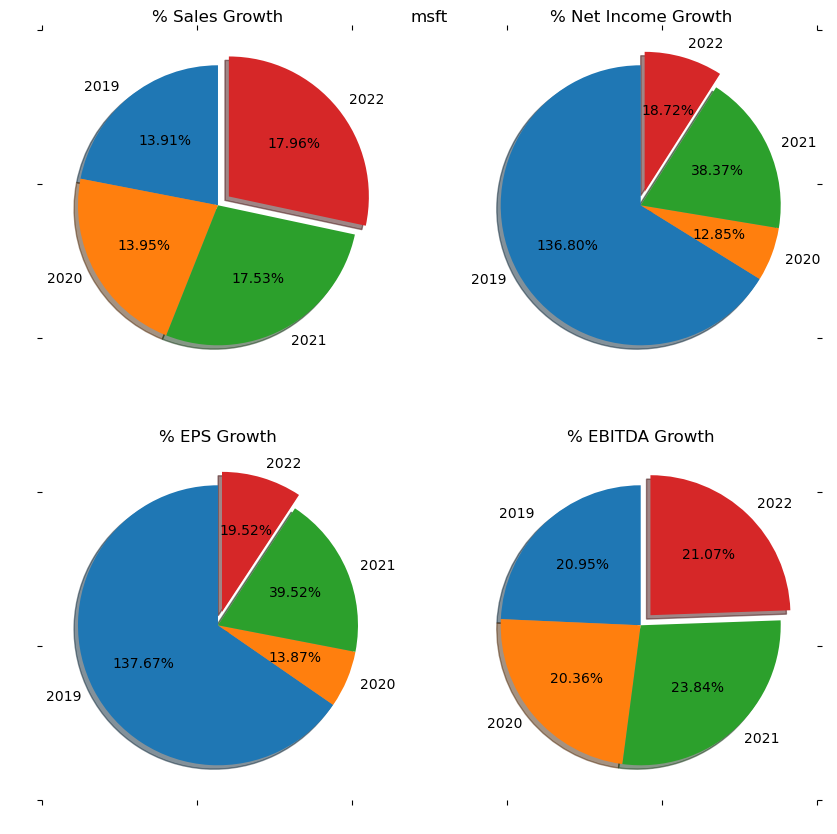

In [37]:
explode = [0. for x in range(1,len(years))]
explode[-1]=0.1
fig, ax = plt.subplots( figsize=(10.0, 10.0) , nrows=1, ncols=1, sharey=False)
ax.set_title(ticker)
# Turn off axis lines and ticks of the big subplot 
# obs alpha is 0 in RGBA string!
ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
# removes the white frame
ax._frameon = False
ax1 = fig.add_subplot(2,2,1) 
ax1.pie(salesgrowth[1:],explode=explode, labels=years[1:],autopct=lambda p: '{:.2f}%'.format(p * sum(salesgrowth[1:])),
        shadow=True, startangle=90)
ax1.set_title("% Sales Growth")

ax2 = fig.add_subplot(2,2,2) 
ax2.pie(Netincomegrowth[1:],explode=explode, labels=years[1:],autopct=lambda p: '{:.2f}%'.format(p * sum(Netincomegrowth[1:])),
        shadow=True, startangle=90)
ax2.set_title("% Net Income Growth")

ax3 = fig.add_subplot(2,2,3) 
ax3.pie(EPSgrowth[1:],explode=explode, labels=years[1:],autopct=lambda p: '{:.2f}%'.format(p * sum(EPSgrowth[1:])),
        shadow=True, startangle=90)
ax3.set_title("% EPS Growth")

ax4 = fig.add_subplot(2,2,4) 
ax4.pie(EBITDAgrowth[1:],explode=explode, labels=years[1:],autopct=lambda p: '{:.2f}%'.format(p * sum(EBITDAgrowth[1:])),
        shadow=True, startangle=90)
ax4.set_title("% EBITDA Growth")